# Module 9: Estimation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import altair as alt
import pandas as pd
import scipy.stats as ss
import statsmodels

## Kernel density estimation

Btw, here are some resources on KDE: https://yyiki.org/wiki/Kernel%20density%20estimation/ Feel free to check out if you want to learn more about KDE. 

Let's import the IMDb data.

In [2]:
import vega_datasets

movies = vega_datasets.data.movies()
movies.head()

,Title,US_Gross,Worldwide_Gross,US_DVD_Sales,Production_Budget,Release_Date,MPAA_Rating,Running_Time_min,Distributor,Source,Major_Genre,Creative_Type,Director,Rotten_Tomatoes_Rating,IMDB_Rating,IMDB_Votes
0,The Land Girls,146083.0,146083.0,NaN,8000000.0,Jun 12 1998,R,NaN,Gramercy,None,None,None,None,NaN,6.1,1071.0
1,"First Love, Last Rites",10876.0,10876.0,NaN,300000.0,Aug 07 1998,R,NaN,Strand,None,Drama,None,None,NaN,6.9,207.0
2,I Married a Strange Person,203134.0,203134.0,NaN,250000.0,Aug 28 1998,None,NaN,Lionsgate,None,Comedy,None,None,NaN,6.8,865.0
3,Let's Talk About Sex,373615.0,373615.0,NaN,300000.0,Sep 11 1998,None,NaN,Fine Line,None,Comedy,None,None,13.0,NaN,NaN
4,Slam,1009819.0,1087521.0,NaN,1000000.0,Oct 09 1998,R,NaN,Trimark,Original Screenplay,Drama,Contemporary Fiction,None,62.0,3.4,165.0


In [3]:
vega_datasets.__version__

'0.9.0'

**Note:** Please check your `vega_datasets` version using `vega_datasets.__version__`. If you have a version lower than `0.9.0`, you will need to check the column names in `movies.head()` and update it accordingly in the code cells below.

**Q: Can you drop rows that have NaN value in either `IMDB_Rating` or `Rotten Tomatoes Rating`?**

In [4]:
# TODO
movies = movies.dropna(subset=['IMDB_Rating','Rotten_Tomatoes_Rating'])

We can plot histogram and KDE using pandas:

<AxesSubplot:ylabel='Density'>

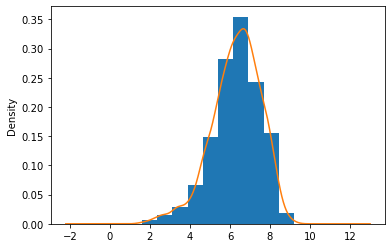

In [5]:
movies['IMDB_Rating'].hist(bins=10, density=True)
movies['IMDB_Rating'].plot(kind='kde')

Or using seaborn:

We can use both `displot` and `histplot` to achieve this result:

In [6]:
sns.__version__

'0.11.1'

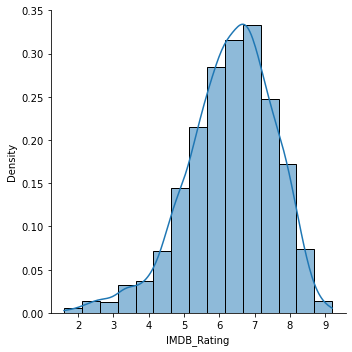

In [7]:
sns.displot(movies['IMDB_Rating'], bins=15,stat='density',kde=True)

<AxesSubplot:xlabel='IMDB_Rating', ylabel='Density'>

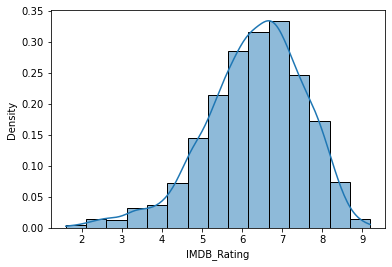

In [8]:
sns.histplot(movies['IMDB_Rating'], bins=15, kde=True, stat='density')

**Q: Can you plot the histogram and KDE of the `Rotten Tomatoes Rating`?**

<AxesSubplot:ylabel='Density'>

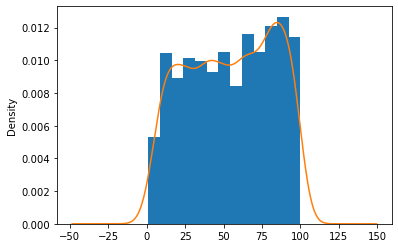

In [9]:
# TODO: implement this using pandas
movies['Rotten_Tomatoes_Rating'].hist(density=True,grid=False,bins='auto')
movies['Rotten_Tomatoes_Rating'].plot.kde()

We can get a random sample using the pandas' [**`sample()`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html) function. The [**`kdeplot()`**](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.kdeplot.html) function in seaborn provides many options to do KDE. Let's sample some data points and see how does KDE plot changes with the size of the samples. 

Seaborn recently deprecated the use of all non-gaussian kernel types and now only support Gaussian kernel.

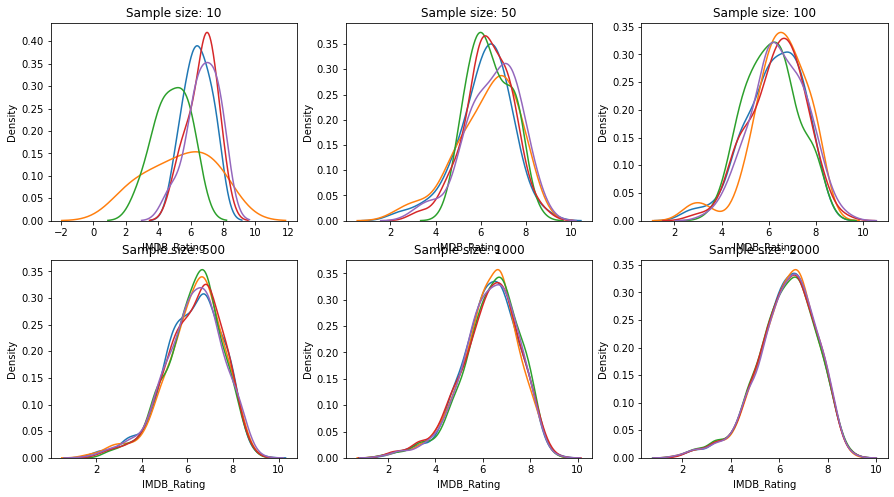

In [10]:
f = plt.figure(figsize=(15,8))
plt.xlim(0, 10)

sample_sizes = [10, 50, 100, 500, 1000, 2000]
for i, N in enumerate(sample_sizes, 1):
    plt.subplot(2,3,i)
    plt.title("Sample size: {}".format(N))
    for j in range(5):
        s = movies['IMDB_Rating'].sample(N)
        sns.kdeplot(s, legend=False)

Let's try all kernel types using scikit-learn's `KernelDensity()`. Plot the same 2x3 grid with different kernels supported by scikit-learn.

Helpful links:

* https://scikit-learn.org/stable/modules/density.html

* https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html#sklearn.neighbors.KernelDensity

### Since the kernel settings are depricated from version 0.11.0 can't use other kernels to produce expected results. Tried with pyplot as well but it also not supporting. 

/Applications/Utilities/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/Applications/Utilities/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/Applications/Utilities/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/Applications/Utilities/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/Applications/Utilities/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Us

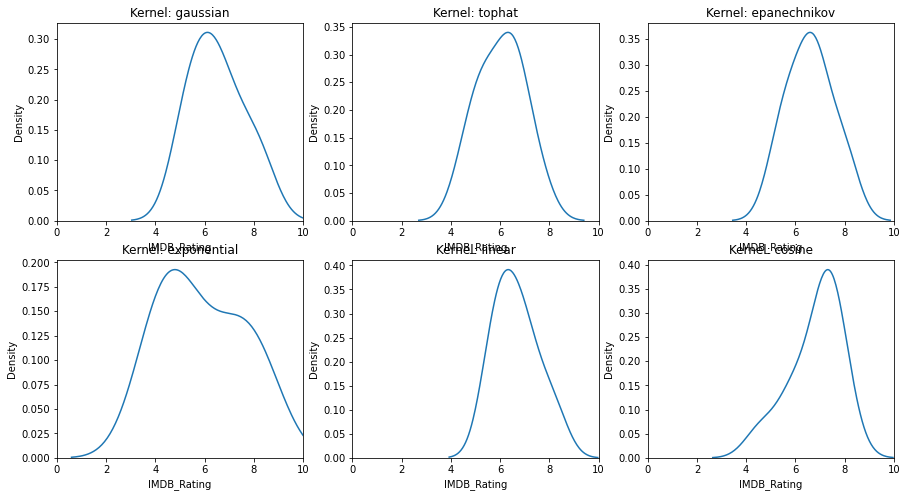

In [11]:
from sklearn.neighbors import KernelDensity
# Implement
f = plt.figure(figsize=(15,8))
kernels = ['gaussian','tophat','epanechnikov','exponential','linear','cosine']
sample_sizes = 10
for i in range(len(kernels)):
    plt.subplot(2,3,i+1)
    plt.xlim(0, 10)
    plt.title("Kernel: {}".format(kernels[i]))
    s = movies['IMDB_Rating'].sample(sample_sizes)
    sns.kdeplot(s, legend=False,kernel=kernels[i])


**Q: We can also play with the bandwidth option. Make sure to set the `xlim` so that all plots have the same x range, so that we can compare.**

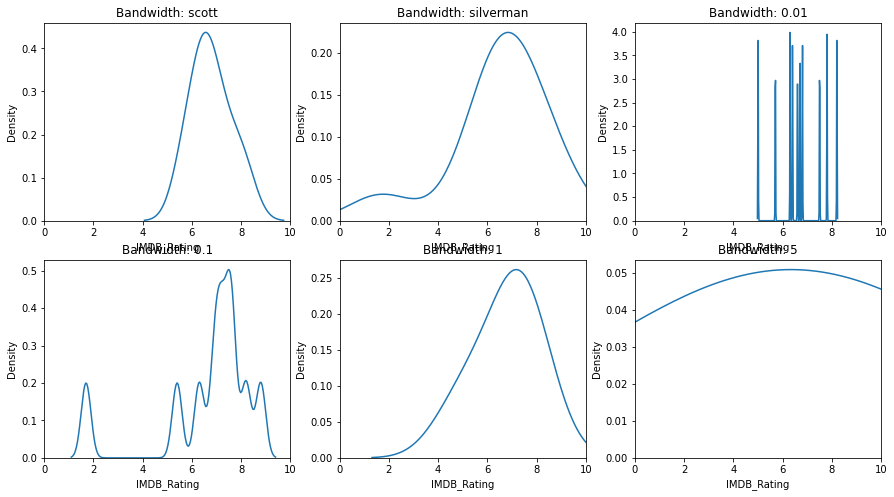

In [12]:
f = plt.figure(figsize=(15,8))
bw_method = ['scott', 'silverman', 0.01, 0.1, 1, 5]
sample_size = 10
# Implement here
for i in range(len(bw_method)):
    plt.subplot(2,3,i+1)
    plt.title("Bandwidth: {}".format(bw_method[i]))
    plt.xlim(0,10)
    s = movies['IMDB_Rating'].sample(sample_size)
    sns.kdeplot(s,legend=False,bw_method=bw_method[i])

**Q: What's your takeaway? Explain how bandwidth affects the result of your visualization.**

#### Bandwidth is helping to smooting the curve and with the sample data set the the bandwidths 'silverman' and 'scott' formed good bell curve shape. The 0.01 and 0.1 has too much noise compare to others.

## Interpolation

One area where interpolation is used a lot is image processing. Play with it!

https://matplotlib.org/examples/images_contours_and_fields/interpolation_methods.html

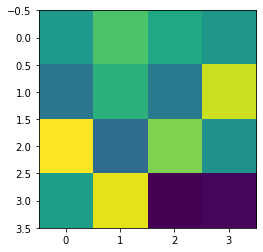

In [13]:
methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']
np.random.seed(0)
grid = np.random.rand(4, 4)

plt.imshow(grid, interpolation=None, cmap='viridis')

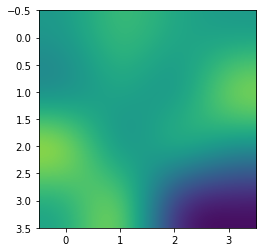

In [14]:
plt.imshow(grid, interpolation='bicubic', cmap='viridis')

Let's look at some time series data. 

In [15]:
co2 = vega_datasets.data.co2_concentration()
co2.head()

,Date,CO2
0,1958-03-01,315.70
1,1958-04-01,317.46
2,1958-05-01,317.51
3,1958-07-01,315.86
4,1958-08-01,314.93


**Note:** If your `vega_datasets` version is below `0.9.0`, you may notice another column named `adjusted CO2` in the output above. If yes, please remove this column by uncommenting the code cell below.

In [16]:
# co2.drop(['adjusted CO2'], axis=1, inplace=True)

In [17]:
co2.Date.dtype

dtype('O')

The `Date` colume is stored as strings. Let's convert it to `datetime` so that we can manipulate. 

In [18]:
pd.to_datetime(co2.Date).head()

0   1958-03-01
1   1958-04-01
2   1958-05-01
3   1958-07-01
4   1958-08-01
Name: Date, dtype: datetime64[ns]

In [19]:
co2.Date = pd.to_datetime(co2.Date)

In [20]:
co2.set_index('Date', inplace=True)
co2.head()

,CO2
Date,
1958-03-01,315.70
1958-04-01,317.46
1958-05-01,317.51
1958-07-01,315.86
1958-08-01,314.93


<AxesSubplot:xlabel='Date'>

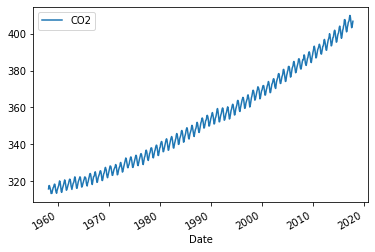

In [21]:
co2.plot()

😢

In [22]:
recent_co2 = co2.tail(8)

<AxesSubplot:xlabel='Date'>

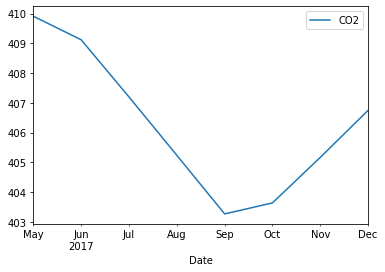

In [23]:
recent_co2.plot()

This standard line chart above can be considered as a chart with linear interpolation between data points. 

The data contains measurements at the resolution of about a month. Let's up-sample the data. This process create new rows that fill the gap between data points. We can use `interpolate()` function to fill the gaps. 

In [24]:
upsampled = recent_co2.resample('D')
upsampled.interpolate().head()

,CO2
Date,
2017-05-01,409.910000
2017-05-02,409.884516
2017-05-03,409.859032
2017-05-04,409.833548
2017-05-05,409.808065


If we do `linear` interpolation, we get more or less the same plot, but just with more points. 

<AxesSubplot:xlabel='Date'>

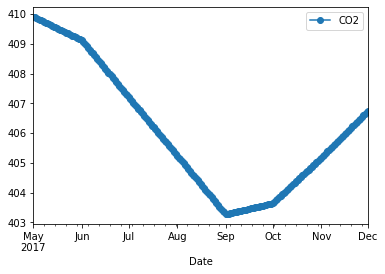

In [25]:
recent_co2.resample('D').interpolate(method='linear').plot(style='o-')

<AxesSubplot:xlabel='Date'>

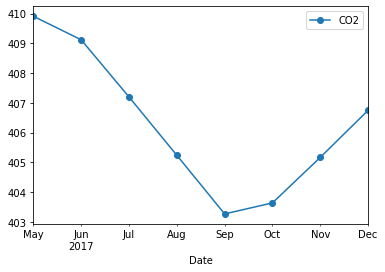

In [26]:
recent_co2.plot(style='o-')

`Nearest` interpolation is just a process of assigning the nearest value to each missing rows. 

<AxesSubplot:xlabel='Date'>

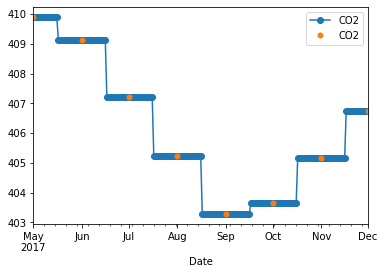

In [27]:
ax = recent_co2.resample('D').interpolate(method='nearest').plot(style='o-')
recent_co2.plot(ax=ax, style='o', ms=5)

Let's try a spline too. 

<AxesSubplot:xlabel='Date'>

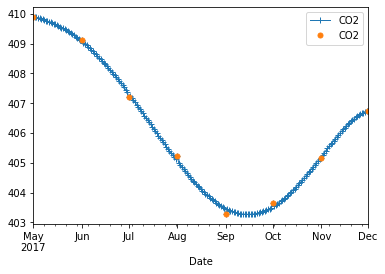

In [28]:
ax = recent_co2.resample('D').interpolate(method='spline', order=5).plot(style='+-', lw=1)
recent_co2.plot(ax=ax, style='o', ms=5)

## Moving average

Pandas has a nice method called `rolling()`: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rolling.html

It lets you do operations on the `rolling` windows. For instance, if you want to calculate the moving average, you can simply

<AxesSubplot:xlabel='Date'>

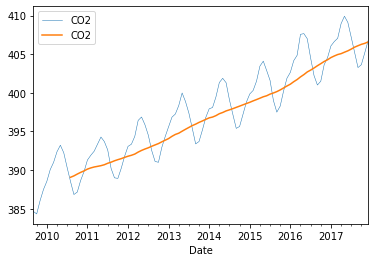

In [29]:
ax = co2[-100:].plot(lw=0.5)
co2[-100:].rolling(12).mean().plot(ax=ax)

By default, it consider every data point inside each window equally (`win_type=None`) but there are many window types supported by `scipy`. Also by default, the mean value is put at the right end of the window (trailing average).  

**Q: can you create a plot with `triang` window type and centered average?**

<AxesSubplot:xlabel='Date'>

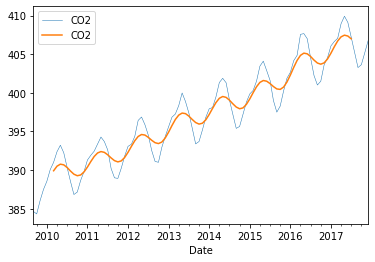

In [30]:
# Implement here
ax = co2[-100:].plot(lw=0.5)
co2[-100:].rolling(12,win_type='triang',center=True).mean().plot(ax=ax)

# Examining relationsips

Remember [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)? Actually, the dataset is not only included in `vega_datasets` but also in `seaborn`. 


In [31]:
df = sns.load_dataset("anscombe")
df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


All four datasets are in this single data frame and the 'dataset' indicator is one of the columns. This is a form often called [tidy data](http://vita.had.co.nz/papers/tidy-data.pdf), which is easy to manipulate and plot. In tidy data, each row is an observation and columns are the properties of the observation. Seaborn makes use of the tidy form. Using seaborn's `lmplot`, you can very quickly examine relationships between variables, separated by some facets of the dataset. 

**Q: Can you produce the plot below using `lmplot()`?**

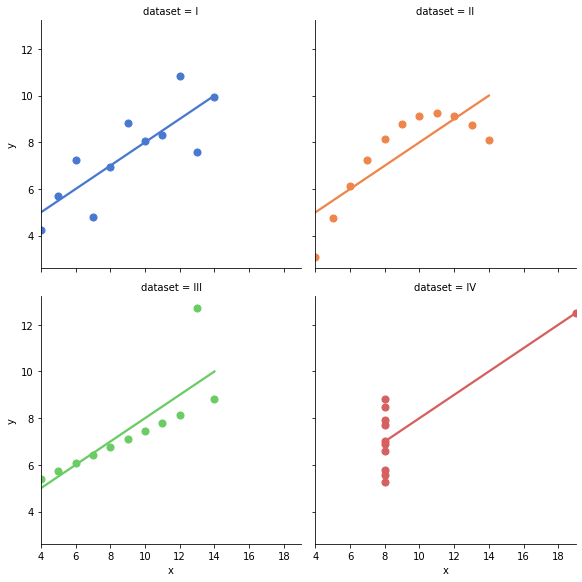

In [32]:
# plotting parameters you can use
palette = "muted"
scatter_kws={"s": 50, "alpha": 1}
ci=None
height=4

# Implement
sns.lmplot(x="x", y="y", col="dataset", data=df,col_wrap=2,
           hue="dataset",sharey=True,sharex=True,scatter=True,
          ci=ci,palette=palette,height=height,scatter_kws=scatter_kws)

**Q: So let's look at the relationship between `IMDB_Rating` and `Rotten Tomatoes Rating` in the `movies` dataset, separated with respect to `MPAA Rating`. Put 4 plots in a row.**

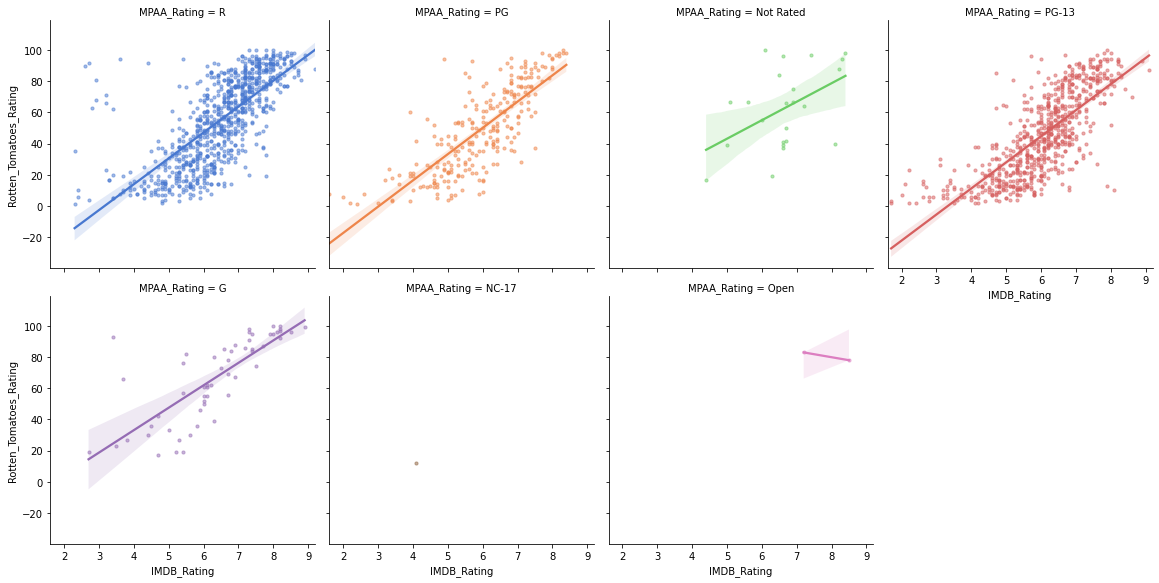

In [33]:
# Implement
palette = "muted"
scatter_kws={"s": 10, "alpha": 0.5}
height=4
sns.lmplot(x="IMDB_Rating", y="Rotten_Tomatoes_Rating", col="MPAA_Rating", data=movies,col_wrap=4,
           hue="MPAA_Rating",sharey=True,sharex=True,scatter=True,
          palette=palette,height=height,scatter_kws=scatter_kws)

It may be interesting to dig up what are the movies that have super high Rotten Tomatoes rating and super low IMDB rating (and vice versa)!

Another useful method for examining relationships is [**`jointplot()`**](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.jointplot.html), which produces a scatter plot with two marginal histograms. 

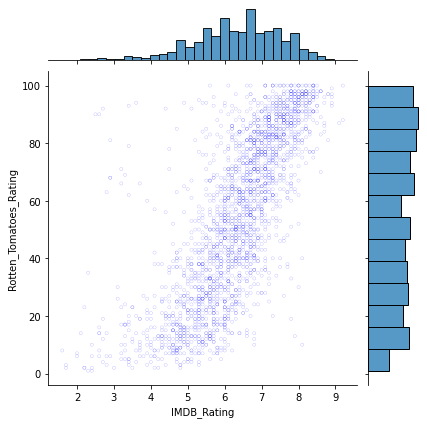

In [34]:
g = sns.jointplot(x = movies['IMDB_Rating'], y = movies['Rotten_Tomatoes_Rating'], s=10, alpha=0.4, facecolors='none', edgecolor='b')

## Hexbin density plot

In 2D, *heatmap* can be considered as a color-based histogram. You divide the space into bins and show the frequency with colors. A common binning method is the hexagonal bin. 

We can again use the [**`jointplot()`**](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.jointplot.html) and setting the `kind` to be `hex`. 

**Q: Can you create one?**

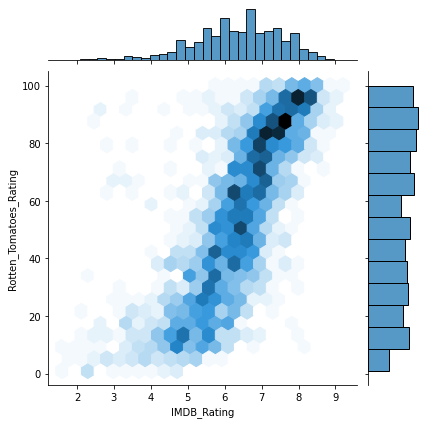

In [35]:
# implement
g = sns.jointplot(x = movies['IMDB_Rating'], y = movies['Rotten_Tomatoes_Rating'], alpha=1, 
                  kind='hex',marginal_kws=dict(fill=True))

## 2D KDE

We can also do 2D KDE using seaborn's [**`kdeplot()`**](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.kdeplot.html) function. 

**Q: Can you draw one like this?**

<AxesSubplot:xlabel='IMDB_Rating', ylabel='Rotten_Tomatoes_Rating'>

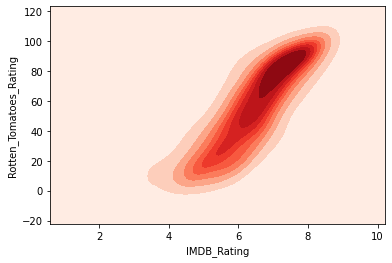

In [36]:
cmap = "Reds"
shade = True  # what happens if you change this?
thresh = 0    # what happens if you change this?

sns.kdeplot(x = movies['IMDB_Rating'], y = movies['Rotten_Tomatoes_Rating'],
           cmap = cmap,shade=shade,thresh = thresh)

<AxesSubplot:xlabel='IMDB_Rating', ylabel='Rotten_Tomatoes_Rating'>

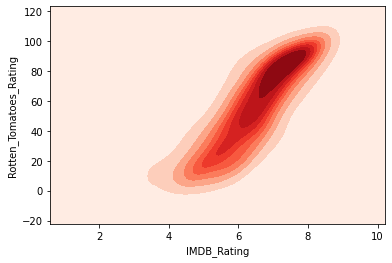

In [37]:
cmap = "Reds"
shade = True  # what happens if you change this?
thresh = 0    # what happens if you change this?

# implement
sns.kdeplot(x = movies['IMDB_Rating'], y = movies['Rotten_Tomatoes_Rating'],
           cmap = cmap,shade=shade,thresh = thresh)

### Changing shade=False hides the shades between the density curves/contour lines
### Changing thresh between 0 to 1 changed the distance between contour line. Lower the value more the distance.

Or again using [**`jointplot()`**](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.jointplot.html) by setting the `kind` parameter. Look, we also have the 1D marginal KDE plots!

**Q: create jointplot with KDE**

(Note that x-axis is in log-scale here)

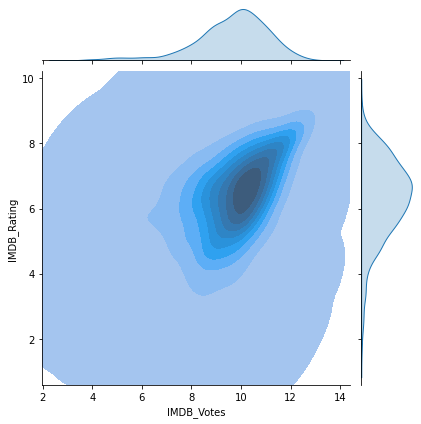

In [38]:
# Implement: draw a joint plot with bivariate KDE as well as marginal distributions with KDE
g = sns.jointplot(x = np.log(movies['IMDB_Votes']), y = movies['IMDB_Rating'], alpha=1
                  ,kind='kde',joint_kws=dict(shade=True,thresh = 0,fill=True),marginal_kws=dict(fill=True))